# Question1

Learn & Understand Zip's Law.

Zipf's law It Simply states that given some corpus (large and structured set of texts) of natural language utterances, the occurrence of the most frequent word will be approximately A- twice as often as the second most frequent word, B- three times as the third most frequent word, C- four times as the fourth most frequent word, and so forth.

# Requirements
Use Glob to read file and loop.
Create one Lambda and one function.
Save Data in CSV file contains (Word, Frequency, Rank) sorted by Rank
Read CSV generated and create log-log figure.
Use matplotlib to generate figure.
Save figure in png file.
Write Conclusion at end.


In [18]:
#Import all the necessary libraries
import nltk
import glob
import string
import re

# use glob to read nltk gutenberg.
file=glob.glob('C:\\Users\\DELL PC\\AppData\\Roaming\\nltk_data\\corpora\\gutenberg\\*.txt')
f = open(file[3],"r") #opening file number 3 from drive
words=f.read().split() #reading words from file
#print(words)

#function named clean with one parameter
def clean(x):
    punctuation = re.compile('\W+|(\d+)')
    return  re.match(punctuation, x)


#lower casing words and putting in cleanList
cleanList = [word.lower() for word in words if not clean(word)]
newList = []
#cleaning word by word and putting in newList
for clean in cleanList:
    a = re.sub('[^A-Za-z]+', '', clean)
    newList.append(a)
print(newList)
 

    


['and', 'sensibility', 'by', 'jane', 'austen', 'chapter', 'the', 'family', 'of', 'dashwood', 'had', 'long', 'been', 'settled', 'in', 'sussex', 'their', 'estate', 'was', 'large', 'and', 'their', 'residence', 'was', 'at', 'norland', 'park', 'in', 'the', 'centre', 'of', 'their', 'property', 'where', 'for', 'many', 'generations', 'they', 'had', 'lived', 'in', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'the', 'general', 'good', 'opinion', 'of', 'their', 'surrounding', 'acquaintance', 'the', 'late', 'owner', 'of', 'this', 'estate', 'was', 'a', 'single', 'man', 'who', 'lived', 'to', 'a', 'very', 'advanced', 'age', 'and', 'who', 'for', 'many', 'years', 'of', 'his', 'life', 'had', 'a', 'constant', 'companion', 'and', 'housekeeper', 'in', 'his', 'sister', 'but', 'her', 'death', 'which', 'happened', 'ten', 'years', 'before', 'his', 'own', 'produced', 'a', 'great', 'alteration', 'in', 'his', 'home', 'for', 'to', 'supply', 'her', 'loss', 'he', 'invited', 'and', 'received', 'into', 'h

In [19]:
#create empty dictionary
frequency={}
#counting frequency of each word from newList
for word in newList:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    #Used Lambda function to sort the dictionary
sortedDict = sorted(frequency.items(), key=lambda x: (-x[1], x[0])) # sorted is used to sort dictionary in descending order.
print(sortedDict)

[('the', 4073), ('to', 4065), ('of', 3564), ('and', 3335), ('her', 2509), ('a', 2035), ('in', 1917), ('was', 1840), ('i', 1688), ('it', 1656), ('she', 1554), ('that', 1304), ('be', 1292), ('not', 1225), ('for', 1214), ('as', 1199), ('you', 1077), ('he', 1048), ('his', 1008), ('had', 989), ('with', 977), ('at', 820), ('have', 812), ('but', 750), ('by', 740), ('is', 728), ('on', 689), ('all', 645), ('him', 633), ('so', 630), ('elinor', 612), ('my', 588), ('which', 586), ('could', 571), ('from', 533), ('mrs', 521), ('would', 512), ('they', 502), ('no', 501), ('their', 496), ('very', 494), ('marianne', 484), ('them', 462), ('were', 440), ('been', 438), ('me', 421), ('this', 419), ('more', 403), ('what', 402), ('any', 390), ('said', 387), ('every', 374), ('than', 359), ('your', 358), ('such', 352), ('will', 352), ('or', 343), ('an', 340), ('one', 315), ('do', 300), ('when', 289), ('much', 286), ('only', 286), ('must', 282), ('own', 269), ('if', 268), ('who', 259), ('herself', 249), ('time',

In [20]:
#Assigning Rank to each word
a=1
ranks=[]

for rank in range(len(sortedDict)):
    x= sortedDict[rank]
    x= x+ (a,)
    ranks.append(x)
    a=a+1
#print(ranks)

import csv

#Writing to the csv file
file= 'C:/Users/DELL PC/Documents/Python/A2Q1.csv'

with open(file, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Word", "Frequency", "Rank"])
    a.writerows(ranks)

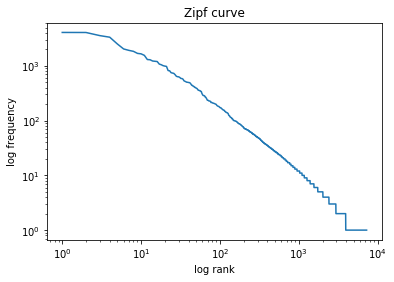

In [21]:
# Plotting graph using matplotlib 
import matplotlib.pyplot as plt
import csv
x = []
y = []
zipfplot = 'C:/Users/DELL PC/Documents/Python/zipfplot.png'
#Read csv file
with open(file,'r') as csvf:
    next(csvf)
    plots = csv.reader(csvf, delimiter=',')
    for row in plots:
        x.append(int(row[2]))
        y.append(int(row[1]))

plt.loglog(x,y, label='Frequency vs Rank')
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.title('Zipf curve')
plt.legend

plt.savefig(zipfplot, bbox_inches='tight')

plt.show()

# Conclusion
    1. Zipf law can be easily verified by plotting the log frequency vs log rank chart
    2. The plot shows "almost" straight line which concludes Zipf law holds in this case
    3. the slope of the line is every case can be different based on count of frequency and rank.
    4. There is no fix value of constant "a" as it depends on the document.
    5. Zipf law makes more errors in highest and lowest frequency words.
    